# Exercise 1: Discrete Filter

In [1]:
import numpy as np

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))
np.set_printoptions(precision=3,edgeitems=30, linewidth=100000)

In [3]:
# motion model for forward
p_no_move = 0.25
p_1_cell = 0.5
p_2_cells = 0.25

# if at last cell
p_last_cell = 1.0

# if at second to last
p_second_last_no_move = 0.25
p_second_last_1_move = 0.75

# the same model for backward

Implement in Python a discrete Bayes filter and estimate the final belief on the position of the robot
after having executed 9 consecutive move forward commands and 3 consecutive move backward
commands. Plot the resulting belief on the position of the robot.

start from an initial belief of
```.py
bel = numpy.hstack ((numpy.zeros(10), 1, numpy.zeros(9)))
```

In [4]:
bel = np.hstack ((np.zeros(10), 1.0, np.zeros(9)))
bel

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

![image.png](DiscreteFilter.png)

In [5]:
def motion_model(bel, action):
    if action == -1:
        bel = np.flip(bel)
    motion_probs = np.array([0.25,0.50,0.25])
    bel = np.convolve(bel,motion_probs)
    bel[-3] = bel[-3] + bel[-2] + bel[-1]
    bel = np.delete(bel, [len(bel)-1,len(bel)-2])
    if action == -1:
        bel = np.flip(bel)
    return bel

In [6]:
bel = np.zeros(20, dtype = np.float)
bel[9] = 1.0
actions = [1]*9 + [-1]*3
print("actions:", actions)
from copy import deepcopy
res = deepcopy(bel)
for action in actions:
    new_bel = motion_model(bel, action)
    res = np.vstack((res, new_bel))
    bel = new_bel
print(res)

actions: [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1]
[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.500e-01 5.000e-01 2.500e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 6.250e-02 2.500e-01 3.750e-01 2.500e-01 6.250e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.562e-02 9.375e-02 2.344e-01 3.125e-01 2.344e-01 9.375e-02 1.562e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.906e-03 3.125e-02 1.094e-01 2.188e-01 2.734e-

In [7]:
import matplotlib.pyplot as plt
from matplotlib import animation

def animate_belief(believes, actions, xlim=0, ylim=1.0):
    """A function used to animate the iterative processes we use."""
    fig = plt.figure(figsize=(10, 6))
    anim_ax = fig.add_subplot(111)
    #anim_ax.set(xlim=xlim, ylim=ylim)
    # anim_ax.set_aspect('equal')
    plt.close()

    # draw initial bar plot
    xes = np.arange(believes.shape[1])
    p_bar = anim_ax.bar(x = xes, height=believes[0])

    def animate(i):
        data = believes[i]
        if i > 0:
            anim_ax.set_title(f"blief after action {i}: {actions[i-1]}, sum: {sum(data)}")
        else:
            anim_ax.set_title("initial belief")
        for i,b in enumerate(p_bar):
            b.set_height(data[i])
    
    
    anim = animation.FuncAnimation(fig, animate,
                                   frames=believes.shape[0],  
                                   blit=False)
    #return anim
    anim.save('prob_bar.mp4',writer=animation.FFMpegWriter(fps=1))
    return HTML(anim.to_jshtml())

animate_belief(res, actions)
#plt.show()


Let's compare with the given solution

My motion model is much shorter and it has only two ifs :D

Given solution in website:

<Figure size 432x288 with 0 Axes>

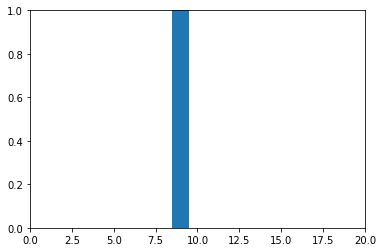

sum belief 1.0


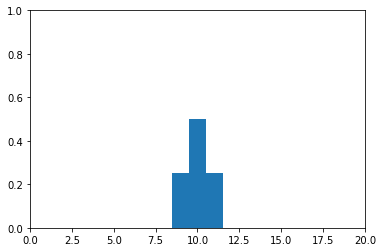

sum belief 1.0


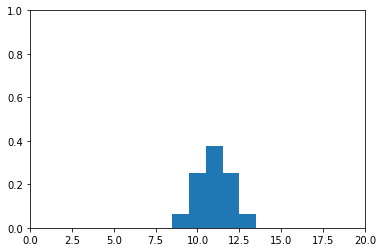

sum belief 1.0


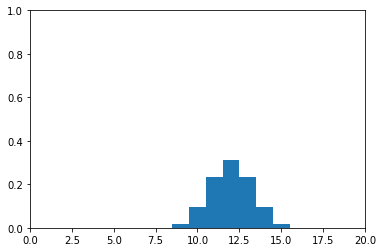

sum belief 1.0


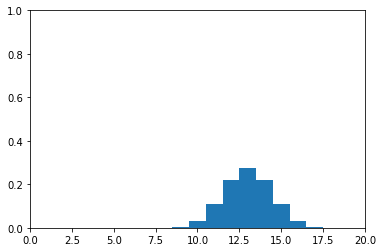

sum belief 1.0


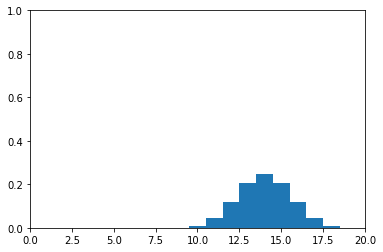

sum belief 1.0


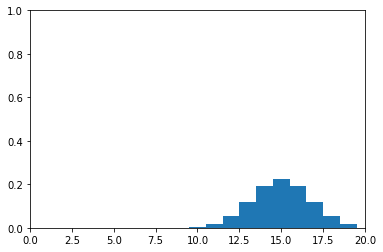

sum belief 1.0


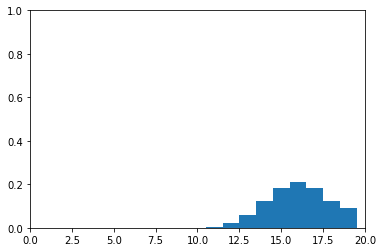

sum belief 1.0


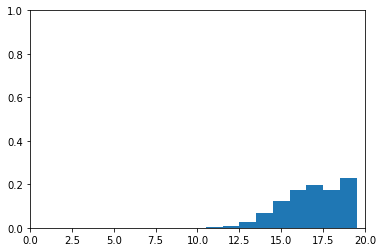

sum belief 1.0


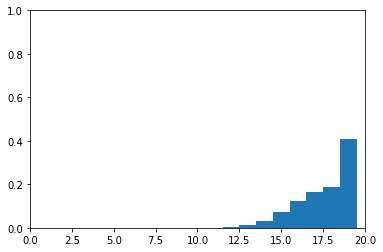

sum belief 1.0


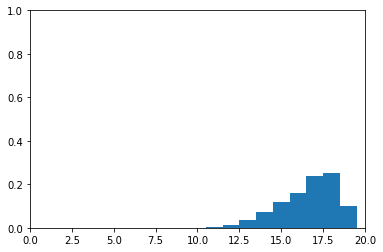

sum belief 1.0


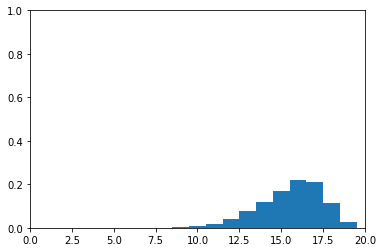

sum belief 1.0


In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
def discrete_filter(bel, u):
    """
    Calculate new belief Bel(x).
    Arguments:
    bel -- current belief of robot position x
    u -- move command (action) -1=backward, 1=forward
    See lecture on discrete filters slide 4 for details.
    """
    bel_prime = np.zeros(bel.shape[0])
    if u == 1: # move forward
        for x in range(bel.shape[0]):
            if x >= 2:
                bel2 = bel[x - 2]
            else:
                bel2 = 0
            if x >= 1:
                bel1 = bel[x - 1]
            else:
                bel1 = 0
            
            bel0 = bel[x]
            if x < bel.shape[0] - 1:
                bel_prime[x] = 0.25 * bel2 + 0.50 * bel1 + 0.25 * bel0
            elif x == bel.shape[0] - 1: # last cell
                bel_prime[x] = 0.25 * bel2 + 0.75 * bel1 + 1.00 * bel0
    if u == -1: # move backward
        for x in range(bel.shape[0]):
            if x < bel.shape[0] - 2:
                bel2 = bel[x + 2]
            else:
                bel2 = 0
            if x < bel.shape[0] - 1:
                bel1 = bel[x + 1]
            else:
                bel1 = 0
            
            bel0 = bel[x]
            if x > 0:
                bel_prime[x] = 0.25 * bel2 + 0.50 * bel1 + 0.25 * bel0
            elif x == 0: # first cell
                bel_prime[x] = 0.25 * bel2 + 0.75 * bel1 + 1.00 * bel0
    return bel_prime

def plot_histogram(bel):
    plt.cla()
    plt.bar(range(0, bel.shape[0]), bel, width=1.0)
    plt.axis([0, bel.shape[0], 0, 1])
    plt.draw()
    plt.pause(1)

def main():
    bel = np.hstack((np.zeros(9), 1, np.zeros(10)))
    plt.figure()
    plt.ion()
    plt.show()
    res = []
    res.append(bel)
    for i in range(0, 9):
        plot_histogram(bel)
        bel = discrete_filter(bel, 1)
        res.append(bel)
        print("sum belief", np.sum(bel))
    for i in range(0, 3):
        plot_histogram(bel)
        bel = discrete_filter(bel, -1)
        res.append(bel)
        print("sum belief", np.sum(bel))
    plt.ioff()
    plt.show()
    return res
    
res2 = main()

In [12]:
print(res2[-1][10])
print(res[-1][10])

0.020629405975341797
0.020629405975341797
